In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/HPM04.csv'
sales = pd.read_csv(file_path)

In [4]:
sales.head()

Statistic Label         Month        Dwelling Status     Eircode Output  \
0  Volume of Sales  2010 January  All Dwelling Statuses                All   
1  Volume of Sales  2010 January  All Dwelling Statuses                All   
2  Volume of Sales  2010 January  All Dwelling Statuses  A41: Ballyboughal   
3  Volume of Sales  2010 January  All Dwelling Statuses  A41: Ballyboughal   
4  Volume of Sales  2010 January  All Dwelling Statuses    A42: Garristown   

  Stamp Duty Event    Type of Buyer    UNIT  VALUE  
0          Filings  All Buyer Types  Number  982.0  
1       Executions  All Buyer Types  Number  947.0  
2          Filings  All Buyer Types  Number    0.0  
3       Executions  All Buyer Types  Number    0.0  
4          Filings  All Buyer Types  Number    0.0

In [5]:
# Filter the data to only include rows with 'mean sales price' or 'median price' in the 'Statistic Label' column
filtered_sales = sales[sales['Statistic Label'].str.contains('mean sale price|median price', case=False)]

# Convert the 'Month' column to datetime format
filtered_sales['Month'] = pd.to_datetime(filtered_sales['Month'], format='%Y %B', errors='coerce')


# Display the cleaned data
filtered_sales.head()



<ipython-input-5-57bd208259b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales['Month'] = pd.to_datetime(filtered_sales['Month'], format='%Y %B', errors='coerce')


Statistic Label      Month        Dwelling Status     Eircode Output  \
300720  Mean Sale Price 2010-01-01  All Dwelling Statuses                All   
300721  Mean Sale Price 2010-01-01  All Dwelling Statuses                All   
300722  Mean Sale Price 2010-01-01  All Dwelling Statuses  A41: Ballyboughal   
300723  Mean Sale Price 2010-01-01  All Dwelling Statuses  A41: Ballyboughal   
300724  Mean Sale Price 2010-01-01  All Dwelling Statuses    A42: Garristown   

       Stamp Duty Event    Type of Buyer  UNIT     VALUE  
300720          Filings  All Buyer Types  Euro  278701.0  
300721       Executions  All Buyer Types  Euro  284811.0  
300722          Filings  All Buyer Types  Euro       NaN  
300723       Executions  All Buyer Types  Euro       NaN  
300724          Filings  All Buyer Types  Euro       NaN

In [6]:
# Extract the year from the 'Month' column
filtered_sales.loc[:, 'Year'] = filtered_sales['Month'].dt.year

# Aggregate the data by year and Statistic Label (mean/median sales price)
agg_sales = filtered_sales.groupby(['Year', 'Statistic Label'])['VALUE'].mean().unstack()

# Display the aggregated data
agg_sales.head()


<ipython-input-6-fea8fa54c4ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales.loc[:, 'Year'] = filtered_sales['Month'].dt.year


Statistic Label  Mean Sale Price   Median Price
Year                                           
2010               238243.330406  224635.067062
2011               208232.461100  194311.787474
2012               182292.619434  167251.157672
2013               175855.218945  160212.221305
2014               189497.500800  172046.062429

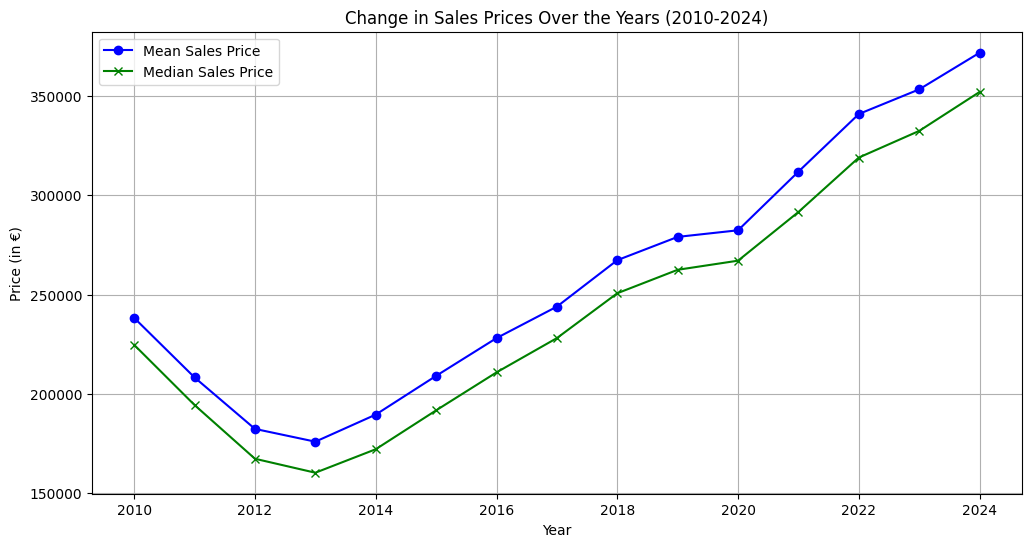

In [7]:
# Clean the column names by stripping any leading/trailing spaces
agg_sales.columns = agg_sales.columns.str.strip()

# Plotting the aggregated data: mean and median sales prices over the years
plt.figure(figsize=(12, 6))

# Plot the mean sales price
plt.plot(agg_sales.index, agg_sales['Mean Sale Price'], label='Mean Sales Price', color='b', marker='o')

# Plot the median sales price
plt.plot(agg_sales.index, agg_sales['Median Price'], label='Median Sales Price', color='g', marker='x')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price (in €)')
plt.title('Change in Sales Prices Over the Years (2010-2024)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


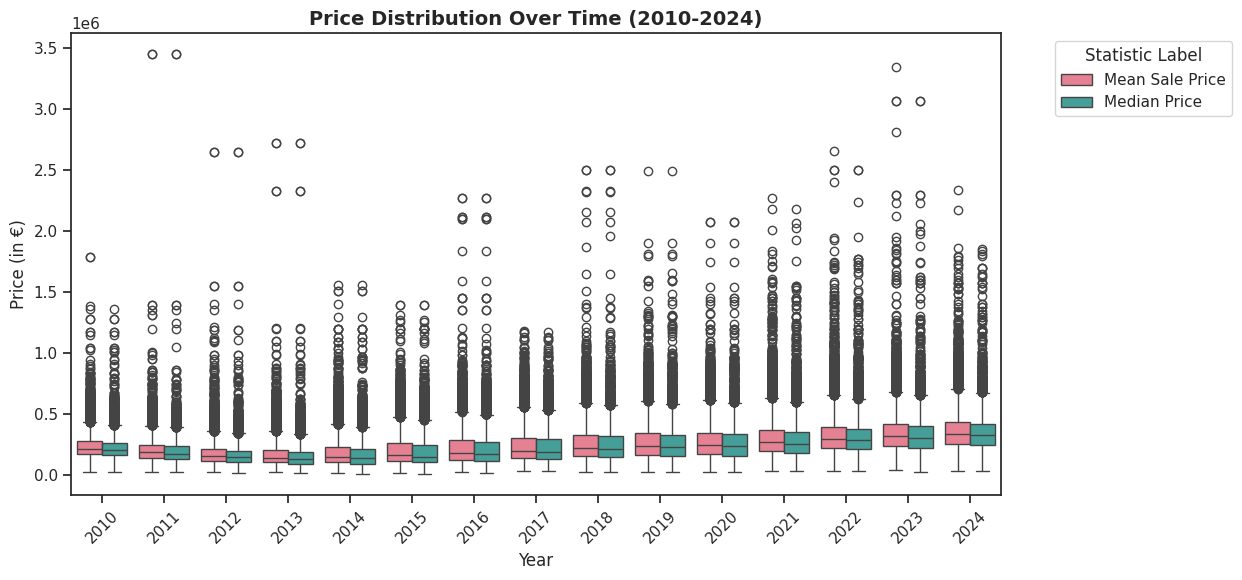

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a brighter theme
sns.set_theme(style="ticks", palette="bright")

plt.figure(figsize=(12, 6))

# Use a more vibrant color palette
sns.boxplot(data=filtered_sales, x='Year', y='VALUE', hue='Statistic Label', palette='husl')

plt.title('Price Distribution Over Time (2010-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (in €)', fontsize=12)
plt.xticks(rotation=45)

# Adjust legend for better visibility
plt.legend(title='Statistic Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


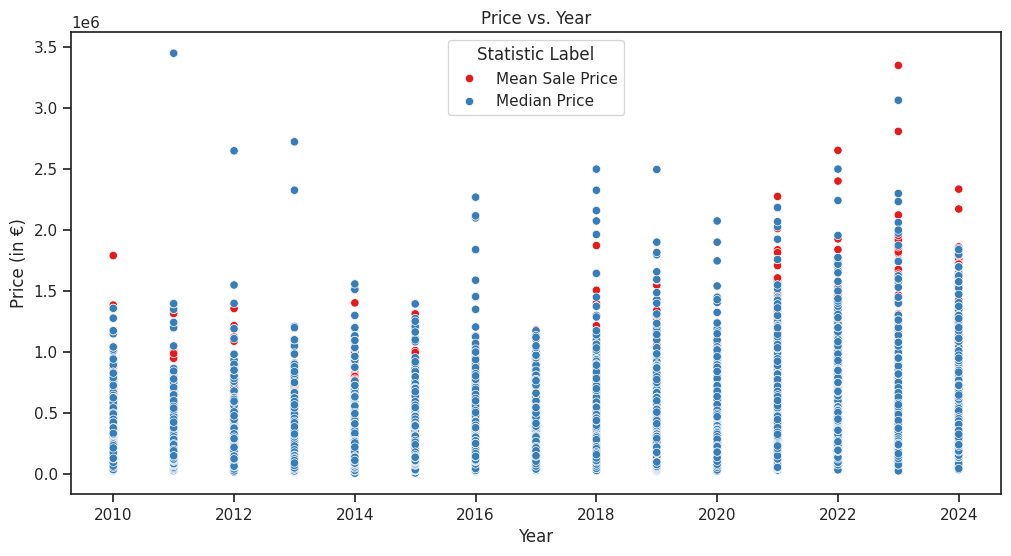

In [9]:
# Scatter plot of price vs. year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_sales, x='Year', y='VALUE', hue='Statistic Label', palette='Set1')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price (in €)')
plt.show()


In [10]:
# Extract place name by removing the Eircode prefix
filtered_sales['Place'] = filtered_sales['Eircode Output'].str.split(': ').str[-1]

# Display unique places to verify
print(filtered_sales['Place'].unique()[:10])  # Show first 10 places


['All' 'Ballyboughal' 'Garristown' 'Oldtown' 'Greystones' 'Wicklow'
 'Castleblaney' 'Carrickmacross' 'Kells' 'Enfield']


<ipython-input-10-5bff7aabb10c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales['Place'] = filtered_sales['Eircode Output'].str.split(': ').str[-1]


In [11]:
# Group by Year and Place, then calculate the mean sale price
place_price_trends = filtered_sales.groupby(['Year', 'Place'])['VALUE'].mean().unstack()

# Display first few rows to verify
place_price_trends.head()


Place            All         Arklow      Ashbourne        Athenry  \
Year                                                                
2010   239466.875000  200068.239437  260940.125000  214408.492958   
2011   207214.756944  164184.907692  229028.830882  196372.790909   
2012   183333.465278  143940.318966  224190.090909  143621.437500   
2013   177215.743056  133595.758621  208250.638889  157461.782258   
2014   188638.215278  153479.792308  230591.083333  144627.492754   

Place        Athlone           Athy     Balbriggan        Ballina  \
Year                                                                
2010   196095.375000  187824.955882  208919.126761  167925.871212   
2011   169159.415493  150882.412698  183905.179104  140897.800000   
2012   120588.641791  102163.370690  150646.158333  116176.913043   
2013   113419.546875  109828.977273  145549.079710   99434.007576   
2014   120755.347826  110566.352459  175627.722222   99869.964286   

Place    Ballinasloe   Ballincollig  ...      Tipperary         Tralee  \
Year                                 ...                                 
2010   164821.242647  279606.986111  ...  162243.903509  197775.000000   
2011   145307.849206  237543.500000  ...  149918.580000  180805.052239   
2012   127856.615385  221141.246377  ...  100488.092593  163393.992647   
2013    92122.084615  205778.794118  ...   80291.083333  128503.573529   
2014    89341.105634  226367.882353  ...   79655.951923  118908.830986   

Place           Tuam      Tullamore      Waterford  Watergrasshill  \
Year                                                                 
2010   169065.417910  195251.231343  205198.687500   275696.490741   
2011   134485.402985  153978.148438  150781.166667   224128.767442   
2012   108687.305085  124721.949275  125966.548611   213031.062500   
2013   104135.460317  121804.284615  113111.873239   155343.133929   
2014   105154.369231  127197.388889  118083.584507   173840.120000   

Place       Westport        Wexford        Wicklow        Youghal  
Year                                                               
2010   199040.007353  187999.664286  312656.291045  186075.621212  
2011   213580.830769  166281.556338  240518.114754  142994.050847  
2012   153345.600000  143485.860294  194050.811475  138259.338983  
2013   163506.570175  119254.234848  193099.109375  113785.250000  
2014   154695.882353  128541.923611  200840.457746  108592.550725  

[5 rows x 140 columns]

In [12]:



print(place_price_trends.columns.tolist())

['All', 'Arklow', 'Ashbourne', 'Athenry', 'Athlone', 'Athy', 'Balbriggan', 'Ballina', 'Ballinasloe', 'Ballincollig', 'Ballinrobe', 'Ballyboughal', 'Ballyhaunis', 'Ballymote', 'Bandon', 'Bantry', 'Belturbet', 'Birr', 'Blackrock', 'Boyle', 'Bray', 'Caherciveen', 'Cahir', 'Carlow', 'Carrick-on-Shannon', 'Carrick-on-Suir', 'Carrickmacross', 'Carrigaline', 'Carrignavar', 'Cashel', 'Castlebar', 'Castleblaney', 'Castlerea', 'Cavan', 'Celbridge', 'Charleville', 'Claremorris', 'Clifden', 'Clonakilty', 'Clones', 'Clonmel', 'Cobh', 'Cootehill', 'Cork Northside', 'Cork Southside', 'Crookstown', 'Curragh', 'Donegal', 'Drogheda', 'Dublin 1', 'Dublin 10', 'Dublin 11', 'Dublin 12', 'Dublin 13', 'Dublin 14', 'Dublin 15', 'Dublin 16', 'Dublin 17', 'Dublin 18', 'Dublin 2', 'Dublin 20', 'Dublin 22', 'Dublin 24', 'Dublin 3', 'Dublin 4', 'Dublin 5', 'Dublin 6', 'Dublin 6W', 'Dublin 7', 'Dublin 8', 'Dublin 9', 'Dunboyne', 'Dundalk', 'Dungarvan', 'Dunmanway', 'Dunshaughlin', 'Edenderry', 'Enfield', 'Ennis', '

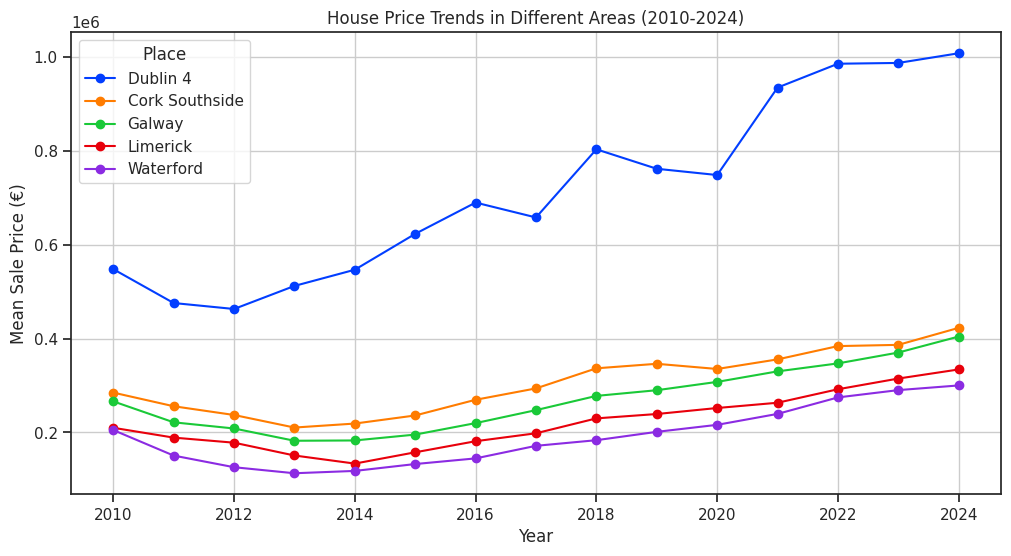

In [13]:
# Select a few sample places to plot (modify as needed)
sample_places = ['Dublin 4', 'Cork Southside', 'Galway', 'Limerick', 'Waterford']  # Ensure these exist in the data

# Plot price trends
plt.figure(figsize=(12, 6))
for place in sample_places:
    if place in place_price_trends.columns:
        plt.plot(place_price_trends.index, place_price_trends[place], marker='o', label=place)

plt.title('House Price Trends in Different Areas (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Mean Sale Price (€)')
plt.legend(title='Place')
plt.grid(True)
plt.show()


In [14]:
import plotly.express as px
import pandas as pd

# Convert data for plotly
df_melted = place_price_trends.reset_index().melt(id_vars='Year', var_name='Place', value_name='Mean Sale Price')
df_melted = df_melted[df_melted['Place'].isin(sample_places)]  # Filter for selected places

# Create interactive plot
fig = px.line(df_melted, x='Year', y='Mean Sale Price', color='Place',
              markers=True, title='🏡 House Price Trends (2010-2024)',
              labels={'Year': 'Year', 'Mean Sale Price': 'Mean Sale Price (€)'})

fig.update_layout(template='plotly_dark', hovermode='x', width=900, height=600)

# Show figure
fig.show()


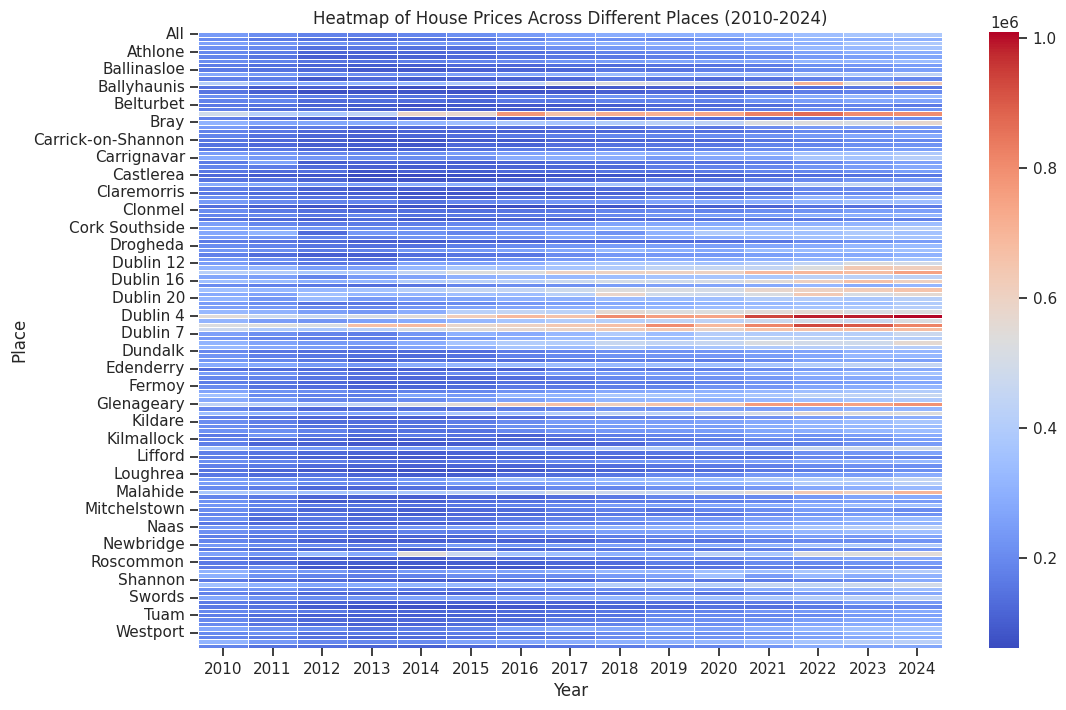

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(place_price_trends.T, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of House Prices Across Different Places (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Place')
plt.show()


In [16]:
census = pd.read_csv("/content/population.csv")

# Display the first few rows
census.head()

Statistic Label  CensusYear    County         Sex    UNIT  \
0  Population at Each Census        1841     State  Both sexes  Number   
1  Population at Each Census        1841    Carlow  Both sexes  Number   
2  Population at Each Census        1841    Dublin  Both sexes  Number   
3  Population at Each Census        1841   Kildare  Both sexes  Number   
4  Population at Each Census        1841  Kilkenny  Both sexes  Number   

     VALUE  
0  6528799  
1    86228  
2   372773  
3   114488  
4   202420

<ipython-input-17-661537702430>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



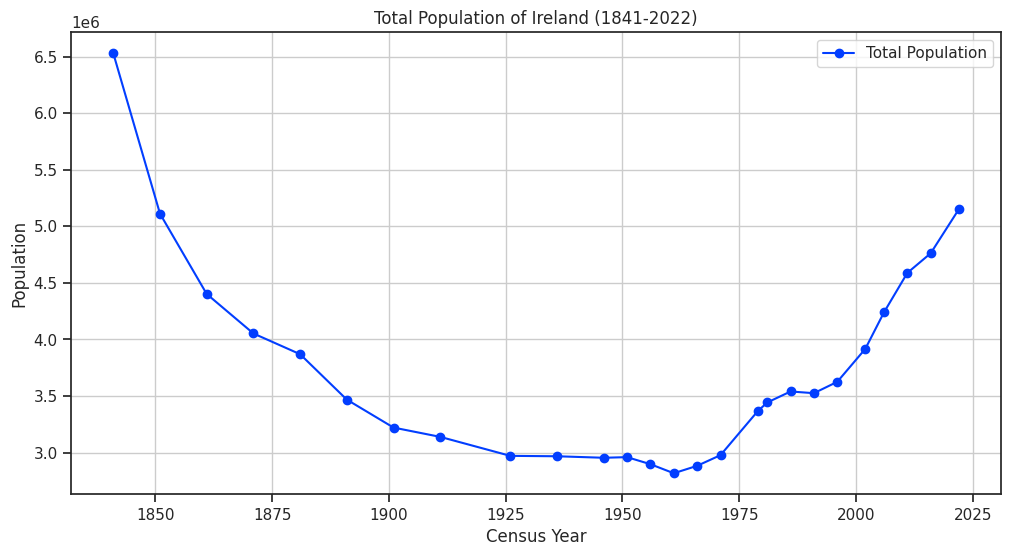

In [17]:
# Filter data for the total population (State level)
state_population = census[census["County"] == "State"]

# Convert CensusYear to integer
state_population["CensusYear"] = state_population["CensusYear"].astype(int)

# Plot the population trend
plt.figure(figsize=(12, 6))
plt.plot(state_population["CensusYear"], state_population["VALUE"], marker='o', linestyle='-', color='b', label="Total Population")

# Labels and title
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.title("Total Population of Ireland (1841-2022)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<ipython-input-18-71a108e1349a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



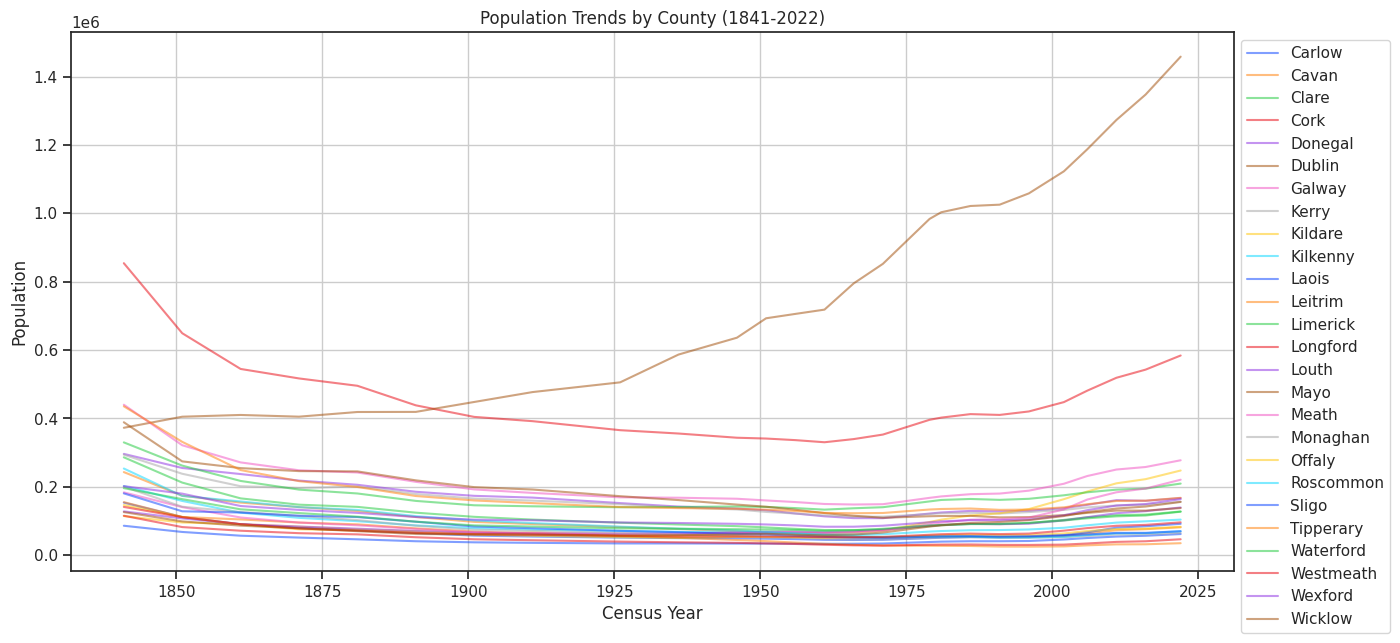

In [18]:
# Filter out 'State' to focus on individual counties
county_population = census[census["County"] != "State"]

# Convert CensusYear to integer
county_population["CensusYear"] = county_population["CensusYear"].astype(int)

# Pivot the data to get counties as columns
county_pivot = county_population.pivot(index="CensusYear", columns="County", values="VALUE")

# Plot population trends for all counties
plt.figure(figsize=(15, 7))
for county in county_pivot.columns:
    plt.plot(county_pivot.index, county_pivot[county], linestyle='-', alpha=0.5, label=county)

# Labels and title
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.title("Population Trends by County (1841-2022)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True)

# Show the plot
plt.show()


<ipython-input-19-8c05a0f800ac>:48: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



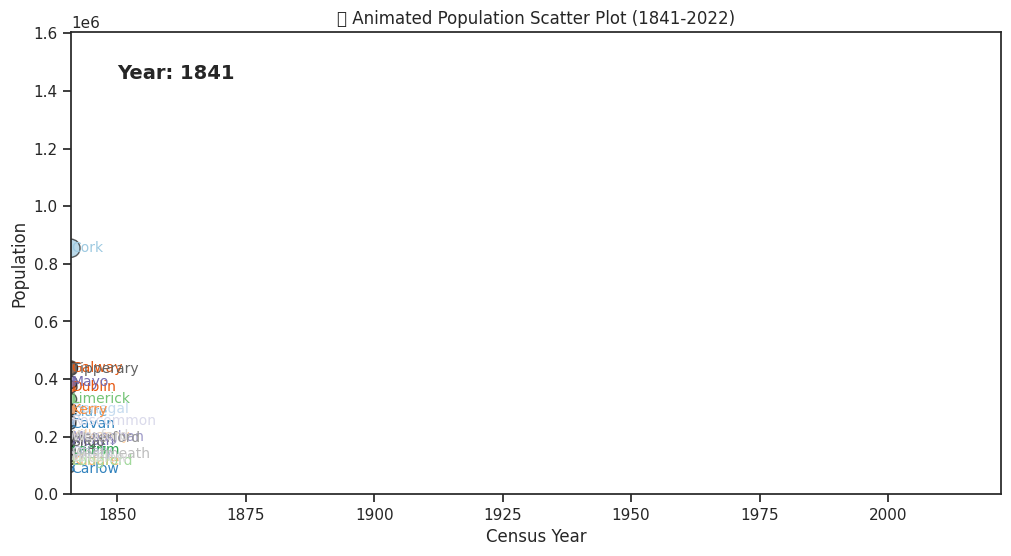

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xlim(county_pivot.index.min(), county_pivot.index.max())  # X-axis: Years
ax.set_ylim(0, county_pivot.max().max() * 1.1)  # Y-axis: Population
ax.set_xlabel("Census Year")
ax.set_ylabel("Population")
ax.set_title("📌 Animated Population Scatter Plot (1841-2022)")

# Get county names
counties = county_pivot.columns.tolist()

# Assign colors (using a more diverse colormap)
colors = plt.cm.tab20c(np.linspace(0, 1, len(counties)))  # Using the "tab20c" colormap for more distinct colors

# Animation function
def update(frame):
    ax.clear()  # Clear the previous frame
    ax.set_xlim(county_pivot.index.min(), county_pivot.index.max())
    ax.set_ylim(0, county_pivot.max().max() * 1.1)
    ax.set_xlabel("Census Year")
    ax.set_ylabel("Population")
    ax.set_title("📌 Animated Population Scatter Plot (1841-2022)")

    year = county_pivot.index[frame]  # Current year
    populations = county_pivot.iloc[frame].values  # Population for this year

    # Scatter plot
    sc = ax.scatter([year] * len(counties), populations, s=populations / 5000, c=colors, alpha=0.7, edgecolors="k")

    # Add labels for each county (slightly offset to avoid overlap)
    for i, county in enumerate(counties):
        ax.text(year + 0.1, populations[i], county, fontsize=10, ha='left', va='center', color=colors[i])

    # Update annotation for the year
    ax.text(0.05, 0.9, f"Year: {year}", transform=ax.transAxes, fontsize=14, weight="bold")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(county_pivot.index), interval=500)

# Display the animation in Colab
HTML(ani.to_html5_video())


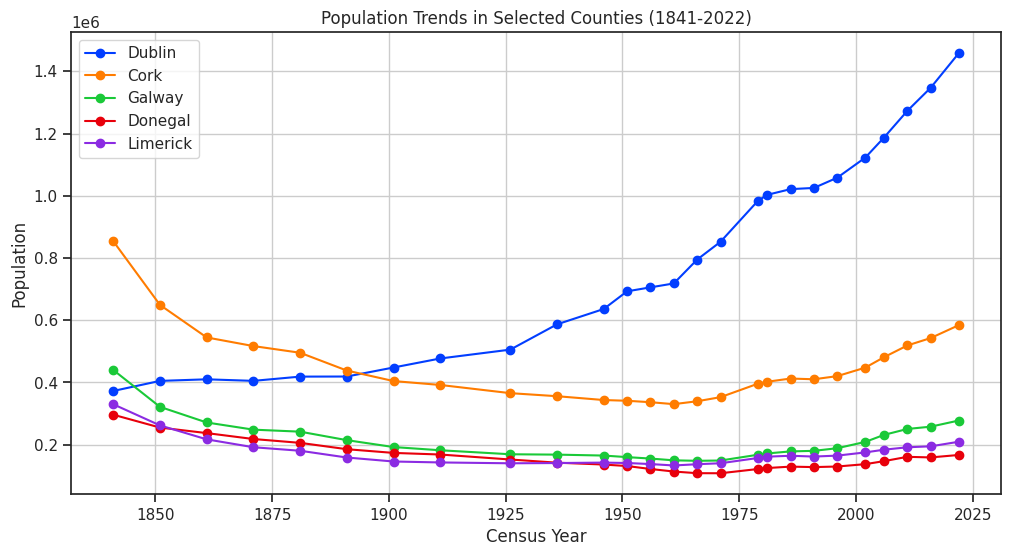

In [20]:
# Define counties to highlight
selected_counties = ["Dublin", "Cork", "Galway", "Donegal", "Limerick"]

# Plot highlighted counties
plt.figure(figsize=(12, 6))
for county in selected_counties:
    plt.plot(county_pivot.index, county_pivot[county], marker='o', label=county)

# Labels and title
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.title("Population Trends in Selected Counties (1841-2022)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


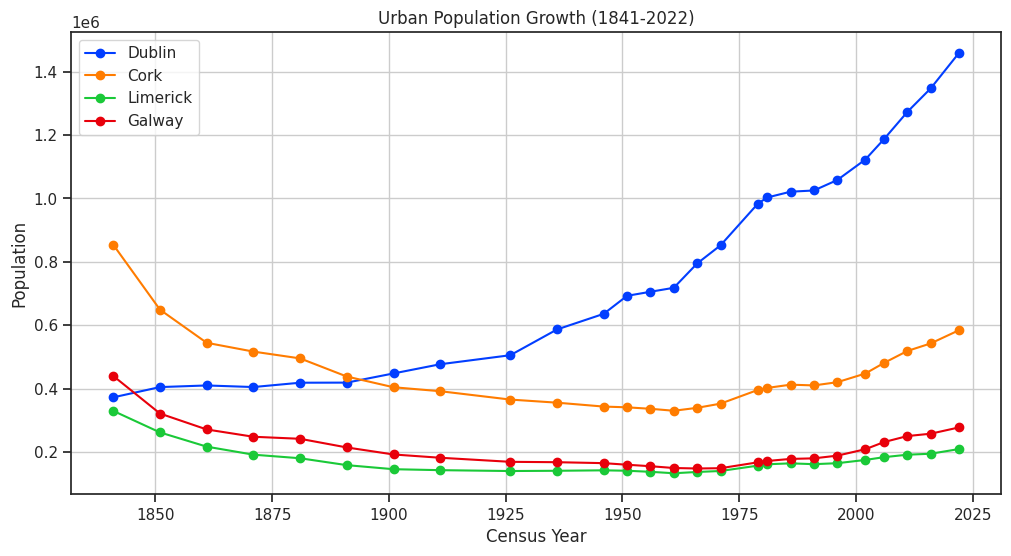

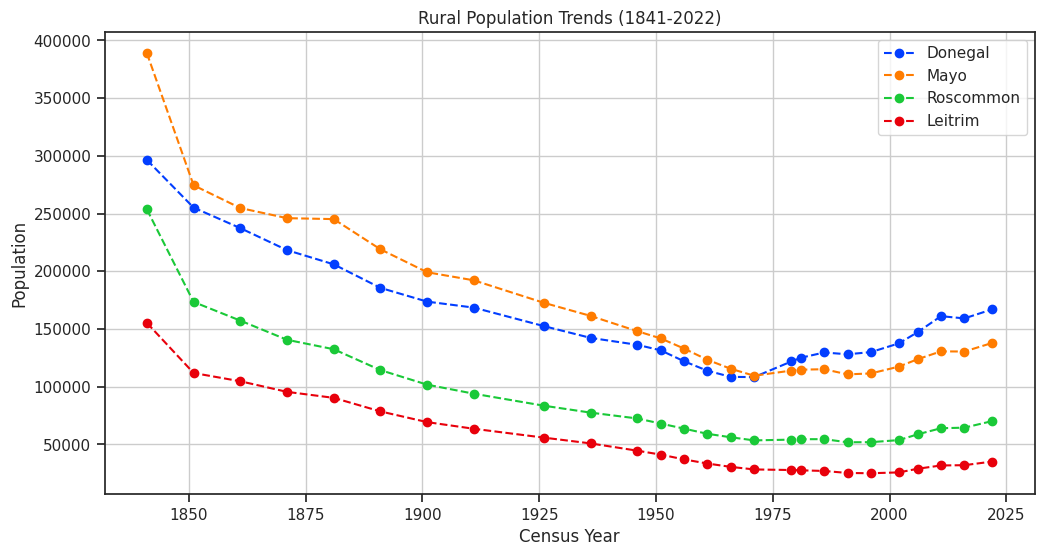

In [21]:
# Define urban and rural counties
urban_counties = ["Dublin", "Cork", "Limerick", "Galway"]
rural_counties = ["Donegal", "Mayo", "Roscommon", "Leitrim"]

# Plot Urban Counties
plt.figure(figsize=(12, 6))
for county in urban_counties:
    plt.plot(county_pivot.index, county_pivot[county], marker='o', label=county)

plt.xlabel("Census Year")
plt.ylabel("Population")
plt.title("Urban Population Growth (1841-2022)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Rural Counties
plt.figure(figsize=(12, 6))
for county in rural_counties:
    plt.plot(county_pivot.index, county_pivot[county], marker='o', linestyle="dashed", label=county)

plt.xlabel("Census Year")
plt.ylabel("Population")
plt.title("Rural Population Trends (1841-2022)")
plt.legend()
plt.grid(True)
plt.show()


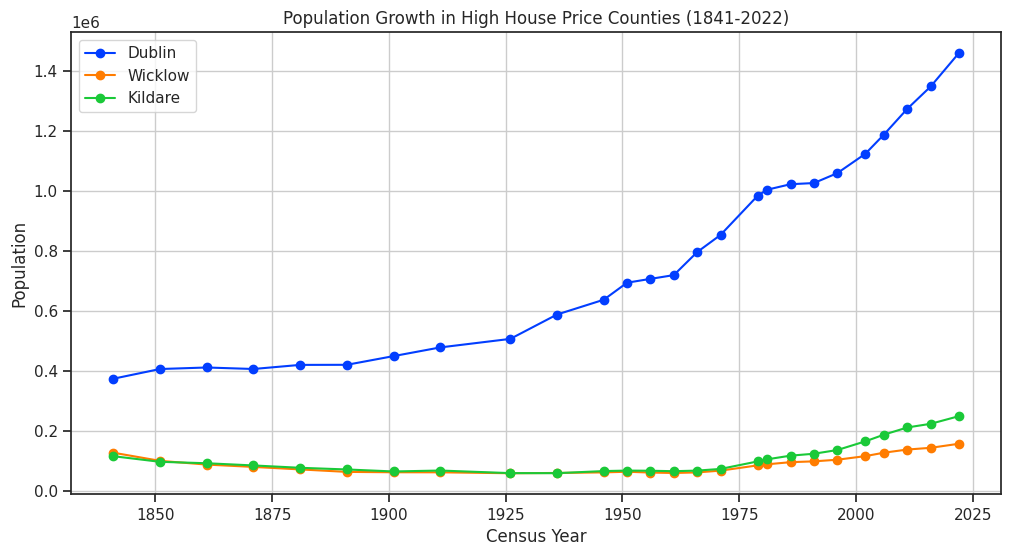

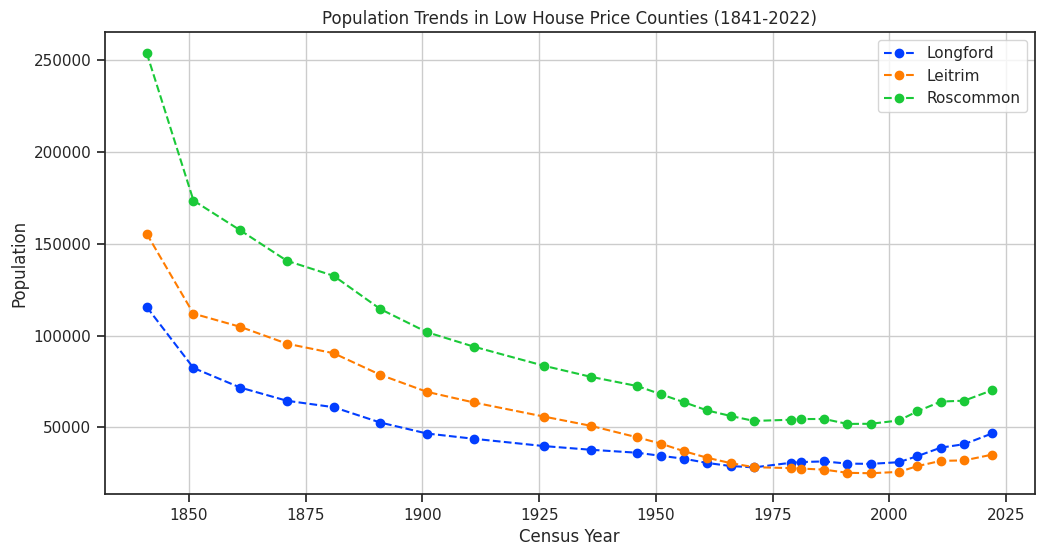

In [22]:
# Define high and low house price counties
high_price_counties = ["Dublin", "Wicklow", "Kildare"]
low_price_counties = ["Longford", "Leitrim", "Roscommon"]

# Plot High Price Counties
plt.figure(figsize=(12, 6))
for county in high_price_counties:
    plt.plot(county_pivot.index, county_pivot[county], marker='o', label=county)

plt.xlabel("Census Year")
plt.ylabel("Population")
plt.title("Population Growth in High House Price Counties (1841-2022)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Low Price Counties
plt.figure(figsize=(12, 6))
for county in low_price_counties:
    plt.plot(county_pivot.index, county_pivot[county], marker='o', linestyle="dashed", label=county)

plt.xlabel("Census Year")
plt.ylabel("Population")
plt.title("Population Trends in Low House Price Counties (1841-2022)")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Calculate percentage change in population for each county
population_change = county_pivot.pct_change() * 100  # Multiply by 100 for percentage

# Drop the first row (since pct_change creates NaN for first entry)
population_change = population_change.dropna()

# Display a sample
population_change.head()


County         Carlow      Cavan      Clare       Cork    Donegal    Dublin  \
CensusYear                                                                    
1851       -21.048847 -28.412390 -25.822468 -23.979122 -13.928244  8.684642   
1861       -16.071271 -11.584354 -21.716720 -16.092517  -6.961569  1.260036   
1871        -9.603234  -8.557821 -11.088662  -5.091976  -8.029234 -1.216326   
1881        -9.839303  -8.000142  -4.333036  -4.152001  -5.633113  3.367698   
1891       -12.094142 -13.561587 -11.999406 -11.536358  -9.901230  0.073047   

County         Galway      Kerry    Kildare   Kilkenny  ...      Meath  \
CensusYear                                              ...              
1851       -26.922885 -18.928134 -16.390364 -21.574943  ... -23.434950   
1861       -15.607242 -15.300478  -4.990441 -21.564366  ... -21.581124   
1871        -8.479508  -2.583746  -8.061927 -12.155965  ... -13.422667   
1881        -2.597220   2.265166  -9.340541  -9.003556  ...  -8.465016   
1891       -11.277866 -10.894901  -7.384835 -12.327817  ... -11.983674   

County       Monaghan     Offaly  Roscommon      Sligo  Tipperary  Waterford  \
CensusYear                                                                     
1851       -29.244869 -23.683583 -31.607983 -28.952489 -23.874477 -16.388446   
1861       -10.817004 -19.658981  -9.319864  -2.855698 -24.870087 -18.156491   
1871        -9.102481 -15.706940 -10.556234  -7.490889 -13.003701  -8.150344   
1881       -10.629822  -4.015810  -5.815028  -3.389816  -7.891082  -8.549185   
1891       -16.099583 -10.005216 -13.656125 -12.157415 -13.237681 -12.873333   

County      Westmeath    Wexford    Wicklow  
CensusYear                                   
1851       -21.155697 -10.827439 -21.534290  
1861       -18.426131 -20.095694 -12.628941  
1871       -13.696233  -7.841394  -8.998716  
1881        -8.458282  -6.642244 -10.560758  
1891        -9.316415  -9.750190 -11.721081  

[5 rows x 26 columns]

In [24]:
population_change.columns

Index(['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway',
       'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick',
       'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly', 'Roscommon',
       'Sligo', 'Tipperary', 'Waterford', 'Westmeath', 'Wexford', 'Wicklow'],
      dtype='object', name='County')

In [25]:
# Group house price data by Census Year (average per year)
avg_house_price_per_census = filtered_sales.groupby('Year')['VALUE'].mean()

# Filter only the census years we have
census_years = county_pivot.index  # 1841, 1851, ..., 2022
avg_house_price_per_census = avg_house_price_per_census.loc[avg_house_price_per_census.index.isin(census_years)]

# Display
avg_house_price_per_census


Year
2011    201272.124287
2016    219413.270278
2022    330015.779246
Name: VALUE, dtype: float64

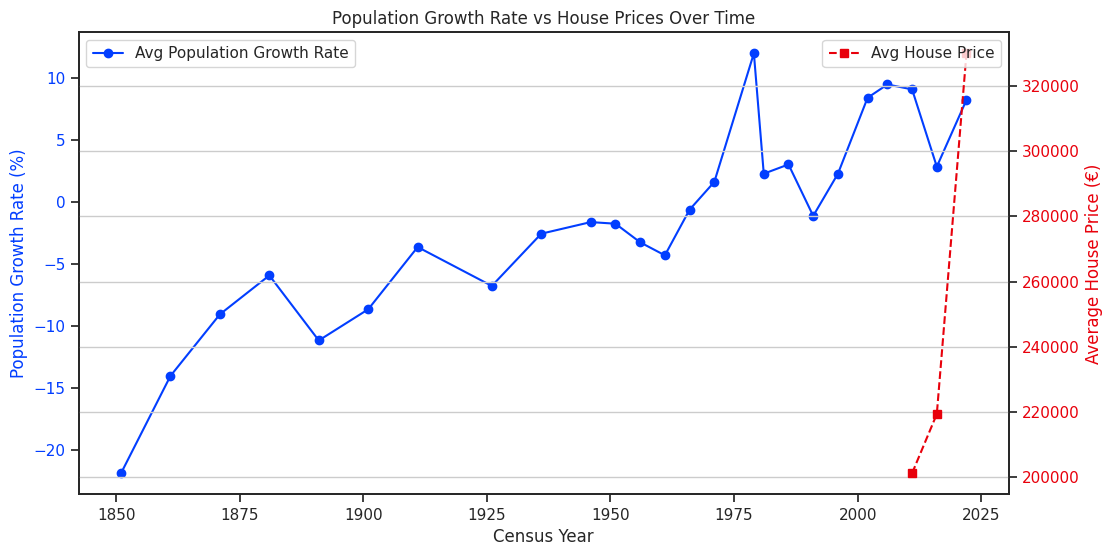

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Population Growth on left y-axis
ax1.set_xlabel("Census Year")
ax1.set_ylabel("Population Growth Rate (%)", color="b")
ax1.plot(population_change.index, population_change.mean(axis=1), marker="o", color="b", label="Avg Population Growth Rate")
ax1.tick_params(axis="y", labelcolor="b")
ax1.legend(loc="upper left")

# Create second y-axis for House Prices
ax2 = ax1.twinx()
ax2.set_ylabel("Average House Price (€)", color="r")
ax2.plot(avg_house_price_per_census.index, avg_house_price_per_census, marker="s", color="r", linestyle="dashed", label="Avg House Price")
ax2.tick_params(axis="y", labelcolor="r")
ax2.legend(loc="upper right")

plt.title("Population Growth Rate vs House Prices Over Time")
plt.grid()
plt.show()


In [27]:
# Filter population data for years 2010 and later
recent_population = county_pivot.loc[county_pivot.index >= 2010]

# Compute percentage change from 2011 onward
recent_population_change = recent_population.pct_change() * 100
recent_population_change = recent_population_change.dropna()

# Display sample
recent_population_change.head()


County        Carlow     Cavan     Clare      Cork   Donegal    Dublin  \
CensusYear                                                               
2016        4.248151  4.089748  1.383153  4.592395 -1.207047  5.835505   
2022        8.845640  7.256879  7.676511  7.605532  4.957536  8.223124   

County        Galway     Kerry    Kildare  Kilkenny  ...      Meath  Monaghan  \
CensusYear                                           ...                        
2016        2.954283  1.515443   5.797101  3.996059  ...   5.924458  1.492981   
2022        7.625805  5.924567  11.357099  4.966140  ...  13.218556  6.356498   

County        Offaly  Roscommon     Sligo  Tipperary  Waterford  Westmeath  \
CensusYear                                                                   
2016        1.661299   0.747678  0.217149   0.503294   2.092359   3.024465   
2022        6.655892   8.854425  7.115282   5.228357   9.629355   8.393601   

County       Wexford   Wicklow  
CensusYear                      
2016        3.029177  4.233753  
2022        9.482240  9.426716  

[2 rows x 26 columns]

In [28]:
# Filter house price data for census years
census_years = [2011, 2016, 2022]
avg_house_price_per_census = filtered_sales[filtered_sales['Year'].isin(census_years)].groupby('Year')['VALUE'].mean()


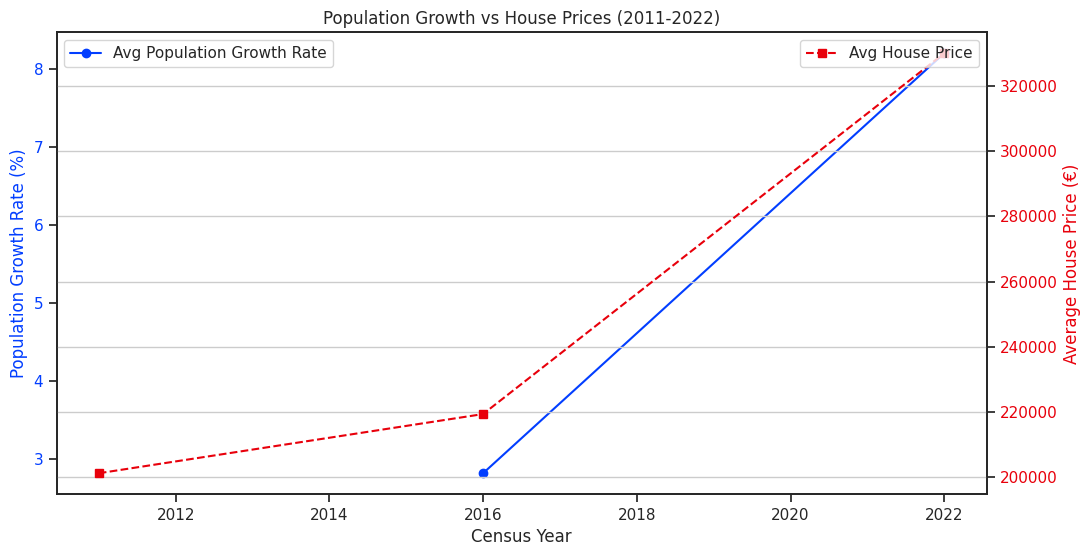

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Population Growth on left y-axis
ax1.set_xlabel("Census Year")
ax1.set_ylabel("Population Growth Rate (%)", color="b")
ax1.plot(recent_population_change.index, recent_population_change.mean(axis=1), marker="o", color="b", label="Avg Population Growth Rate")
ax1.tick_params(axis="y", labelcolor="b")
ax1.legend(loc="upper left")

# Create second y-axis for House Prices
ax2 = ax1.twinx()
ax2.set_ylabel("Average House Price (€)", color="r")
ax2.plot(avg_house_price_per_census.index, avg_house_price_per_census, marker="s", color="r", linestyle="dashed", label="Avg House Price")
ax2.tick_params(axis="y", labelcolor="r")
ax2.legend(loc="upper right")

plt.title("Population Growth vs House Prices (2011-2022)")
plt.grid()
plt.show()


In [30]:
pop_growth = (recent_population.iloc[-1] - recent_population.iloc[0]) / recent_population.iloc[0] * 100

# Get the top 5 highest and bottom 5 lowest growth counties
top_5 = pop_growth.nlargest(5)
bottom_5 = pop_growth.nsmallest(5)

print("Top 5 Growth Counties:\n", top_5)
print("\nBottom 5 Growth Counties:\n", bottom_5)

Top 5 Growth Counties:
 County
Meath       19.926141
Longford    19.874359
Kildare     17.812583
Dublin      14.538489
Wicklow     14.059573
dtype: float64

Bottom 5 Growth Counties:
 County
Donegal      3.690648
Mayo         5.612456
Tipperary    5.757965
Sligo        7.347881
Kerry        7.529793
dtype: float64


In [31]:

# Load the dataset
file_path = "/content/HPM04.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601440 entries, 0 to 601439
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Statistic Label   601440 non-null  object 
 1   Month             601440 non-null  object 
 2   Dwelling Status   601440 non-null  object 
 3   Eircode Output    601440 non-null  object 
 4   Stamp Duty Event  601440 non-null  object 
 5   Type of Buyer     601440 non-null  object 
 6   UNIT              601440 non-null  object 
 7   VALUE             559730 non-null  float64
dtypes: float64(1), object(7)
memory usage: 36.7+ MB


(None,
    Statistic Label         Month        Dwelling Status     Eircode Output  \
 0  Volume of Sales  2010 January  All Dwelling Statuses                All   
 1  Volume of Sales  2010 January  All Dwelling Statuses                All   
 2  Volume of Sales  2010 January  All Dwelling Statuses  A41: Ballyboughal   
 3  Volume of Sales  2010 January  All Dwelling Statuses  A41: Ballyboughal   
 4  Volume of Sales  2010 January  All Dwelling Statuses    A42: Garristown   
 
   Stamp Duty Event    Type of Buyer    UNIT  VALUE  
 0          Filings  All Buyer Types  Number  982.0  
 1       Executions  All Buyer Types  Number  947.0  
 2          Filings  All Buyer Types  Number    0.0  
 3       Executions  All Buyer Types  Number    0.0  
 4          Filings  All Buyer Types  Number    0.0  )

In [34]:
# prompt: extract ie_shp.zip from content

import zipfile

# Assuming ie_shp.zip is in the /content directory
with zipfile.ZipFile('/content/ie_shp.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/') # Extract to /content/


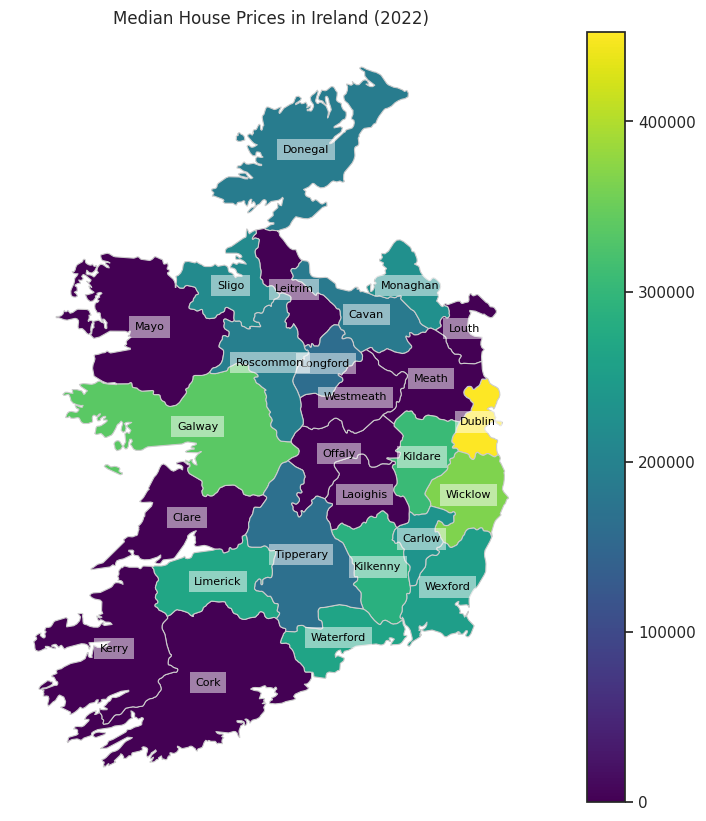

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the shapefile
try:
    ireland_map = gpd.read_file('/content/ie.shp')
except FileNotFoundError:
    print("Error: ie.shp not found. Please ensure the shapefile is correctly extracted.")
    exit()

# 2. Filter data for the year 2022
sales_2022 = filtered_sales[filtered_sales['Year'] == 2022].copy()

# 3. Clean/Unify county names
# Example approach: if a county name starts with "Dublin", unify it to "Dublin"
sales_2022['Place'] = sales_2022['Place'].str.strip()  # Remove extra spaces
sales_2022['Place'] = sales_2022['Place'].apply(
    lambda x: "Dublin" if x.lower().startswith("dublin") else x
)

# 4. Group by unified 'Place' to find median prices
median_prices_2022 = sales_2022.groupby('Place')['VALUE'].median().reset_index()

# 5. Merge with the map data
# Make sure 'name' in the shapefile matches the cleaned-up county name in your data
merged_data = ireland_map.merge(median_prices_2022, left_on='name', right_on='Place', how='left')

# Replace NaN with 0 or another suitable default
merged_data['VALUE'] = merged_data['VALUE'].fillna(0)

# 6. Plot the map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(
    column='VALUE',
    cmap='viridis',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

# 7. Add labels for each region
for idx, row in merged_data.iterrows():
    centroid = row['geometry'].centroid
    if centroid.is_valid:  # Ensure centroid is valid
        plt.text(
            centroid.x,
            centroid.y,
            row['name'],
            fontsize=8,
            ha='center',
            va='center',
            color='black',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
        )

ax.set_title('Median House Prices in Ireland (2022)')
ax.set_axis_off()  # Remove axis ticks/labels for a clean map

plt.show()


<ipython-input-36-f4ac16319955>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



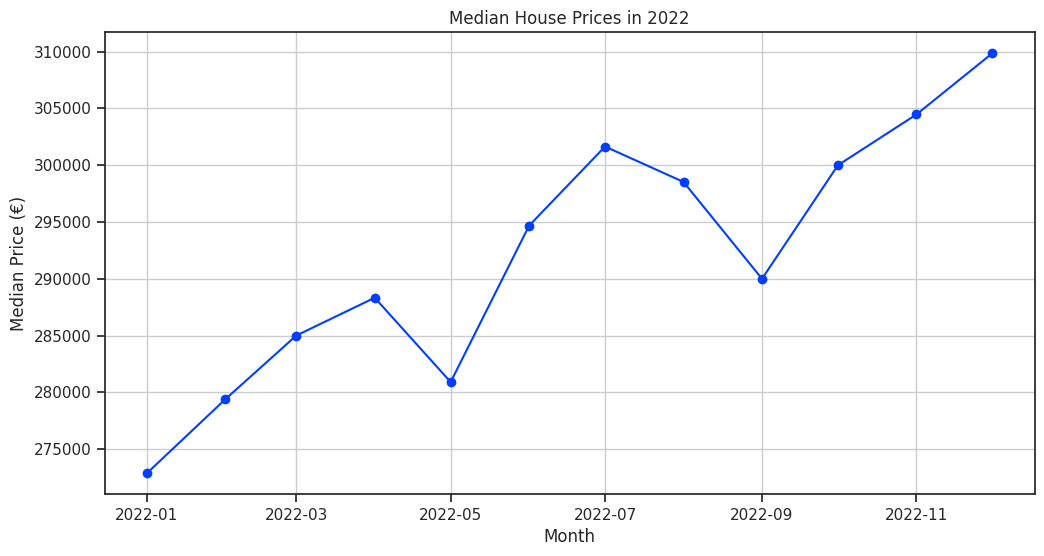

In [36]:
# prompt: plot the median prices on the above plot for the year 2022

import matplotlib.pyplot as plt
# Extract the year from the 'Month' column
filtered_sales['Year'] = filtered_sales['Month'].dt.year

# Filter data for the year 2022
sales_2022 = filtered_sales[filtered_sales['Year'] == 2022]

# Group data by month and get the median price
median_prices_2022 = sales_2022.groupby('Month')['VALUE'].median()

# Plotting the median prices for 2022
plt.figure(figsize=(12, 6))
plt.plot(median_prices_2022.index, median_prices_2022.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Median Price (€)')
plt.title('Median House Prices in 2022')
plt.grid(True)
plt.show()


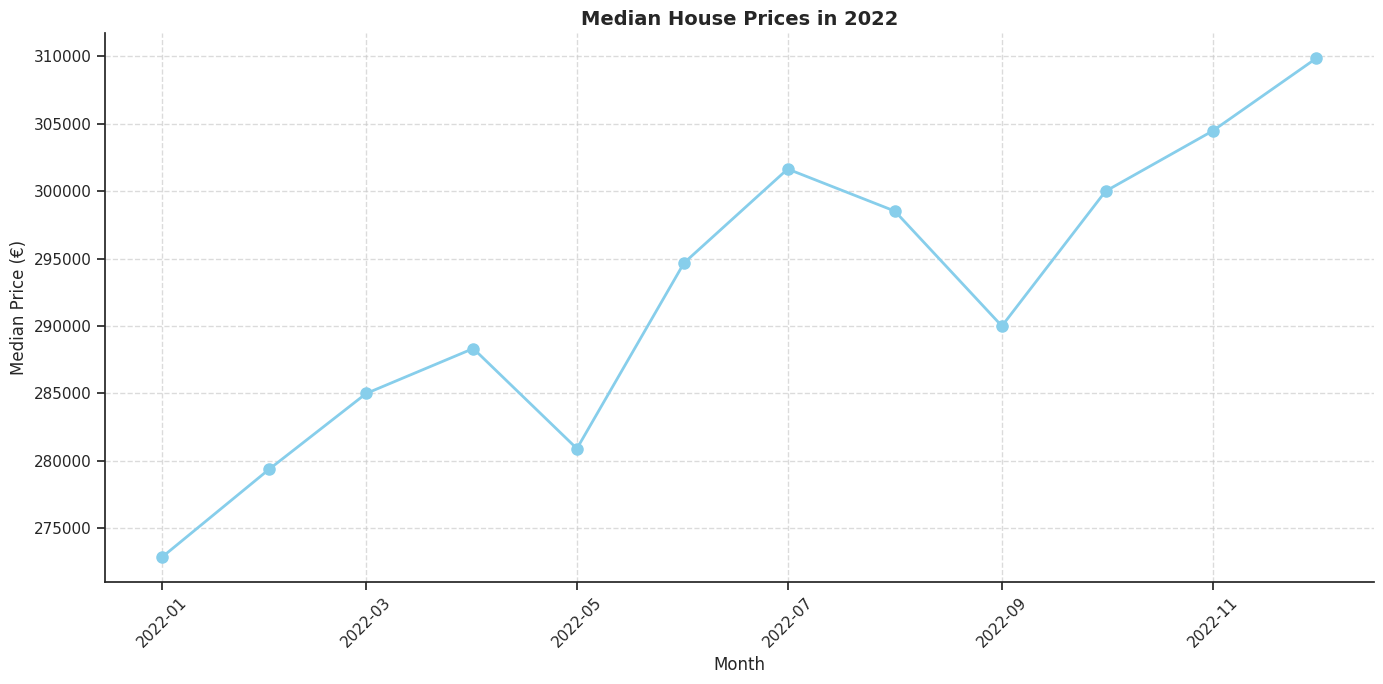

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


SelectMultiple(description='Counties:', index=(0,), options=('All', 'Arklow', 'Ashbourne', 'Athenry', 'Athlone…

In [37]:


import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...


# Plotting the median prices for 2022 with enhanced visualization
plt.figure(figsize=(14, 7))  # Increased figure size
plt.plot(median_prices_2022.index, median_prices_2022.values,
         marker='o', linestyle='-', linewidth=2, markersize=8, color='skyblue')  # Adjusted line and marker properties
plt.xlabel('Month', fontsize=12)
plt.ylabel('Median Price (€)', fontsize=12)
plt.title('Median House Prices in 2022', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7) # More subtle grid
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
sns.despine() # Remove top and right spines for cleaner look
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Interactive Dropdown for County Selection (requires ipywidgets)
# Install if you don't have it
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display

# Get a list of unique counties (modify 'Place' if needed)
counties = sorted(filtered_sales['Place'].unique().tolist())

# Create the dropdown widget
county_dropdown = widgets.SelectMultiple(
    options=counties,
    value=[counties[0]],  # Default value (first county)
    description='Counties:',
    rows=10,  # Adjust the number of rows shown
    disabled=False
)

# Display the dropdown
display(county_dropdown)

# Callback function to update plot when county selection changes
def update_plot(change):
    selected_counties = list(change.new)  # Get selected county names

    # Filter data based on selected counties
    filtered_data = filtered_sales[filtered_sales['Place'].isin(selected_counties)]

    # Plot the median prices for the selected counties
    plt.figure(figsize=(12, 6))
    for county in selected_counties:
      county_data = filtered_data[filtered_data['Place'] == county]
      median_prices_county = county_data.groupby('Month')['VALUE'].median()
      plt.plot(median_prices_county.index, median_prices_county.values, marker='o', linestyle='-', label=county)


    plt.xlabel('Month')
    plt.ylabel('Median Price (€)')
    plt.title('Median House Prices in Selected Counties')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout() # adjust layout
    plt.show()

# Observe changes in the dropdown and call update_plot
county_dropdown.observe(update_plot, names='value')


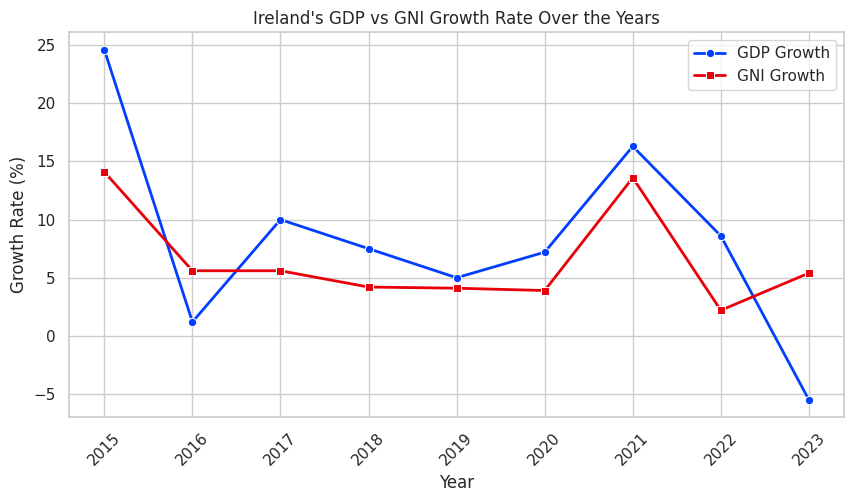

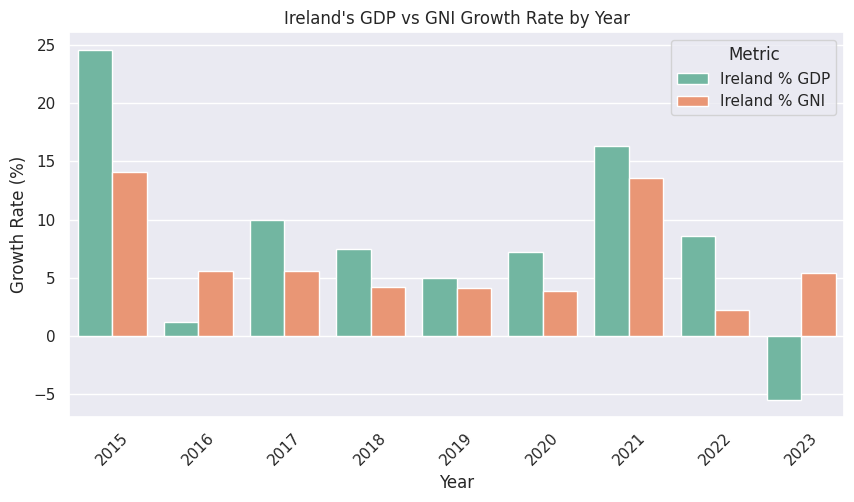

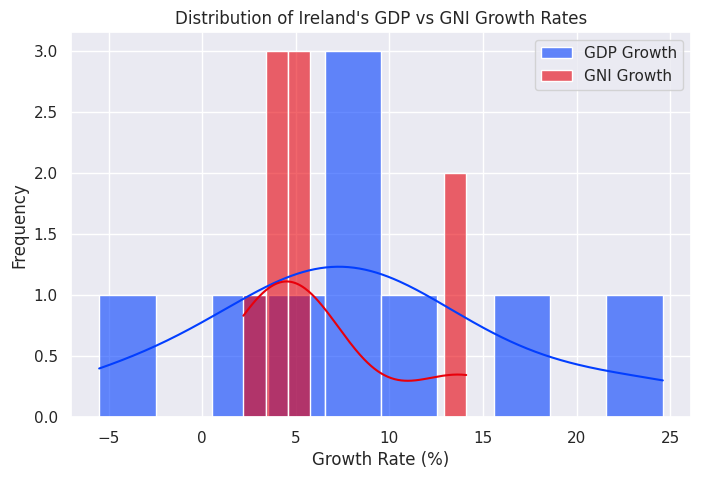

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/MIP10.20250218T210259.csv"
df = pd.read_csv(file_path)

# Filter GDP and GNI growth rates
gdp_df = df[df['Countries'] == 'Ireland % GDP']
gni_df = df[df['Countries'] == 'Ireland % GNI']

# Set the style for seaborn
sns.set_style("whitegrid")

# Create a line plot for GDP and GNI growth over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='VALUE', data=gdp_df, marker='o', linewidth=2, color='b', label='GDP Growth')
sns.lineplot(x='Year', y='VALUE', data=gni_df, marker='s', linewidth=2, color='r', label='GNI Growth')
plt.title("Ireland's GDP vs GNI Growth Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Create a bar plot for GDP and GNI growth per year with improved theme
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.set_palette("Set2")
df_filtered = df[df['Countries'].isin(['Ireland % GDP', 'Ireland % GNI'])]
sns.barplot(x='Year', y='VALUE', hue='Countries', data=df_filtered)
plt.title("Ireland's GDP vs GNI Growth Rate by Year")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

# Distribution of GDP and GNI growth rates
plt.figure(figsize=(8, 5))
sns.histplot(gdp_df['VALUE'], bins=10, kde=True, color='b', label='GDP Growth', alpha=0.6)
sns.histplot(gni_df['VALUE'], bins=10, kde=True, color='r', label='GNI Growth', alpha=0.6)
plt.title("Distribution of Ireland's GDP vs GNI Growth Rates")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


<ipython-input-39-00ef056651a5>:17: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




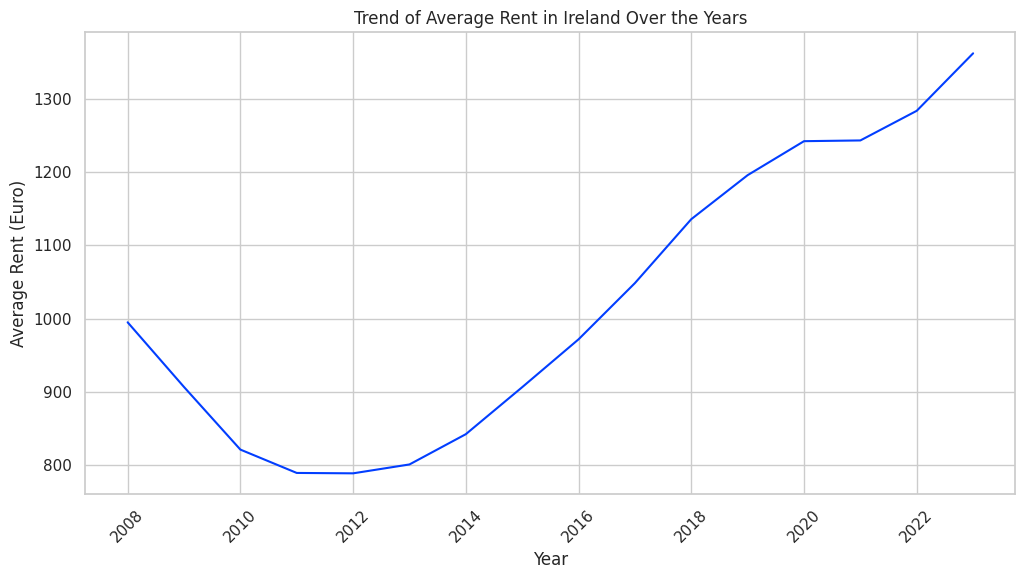

<ipython-input-39-00ef056651a5>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




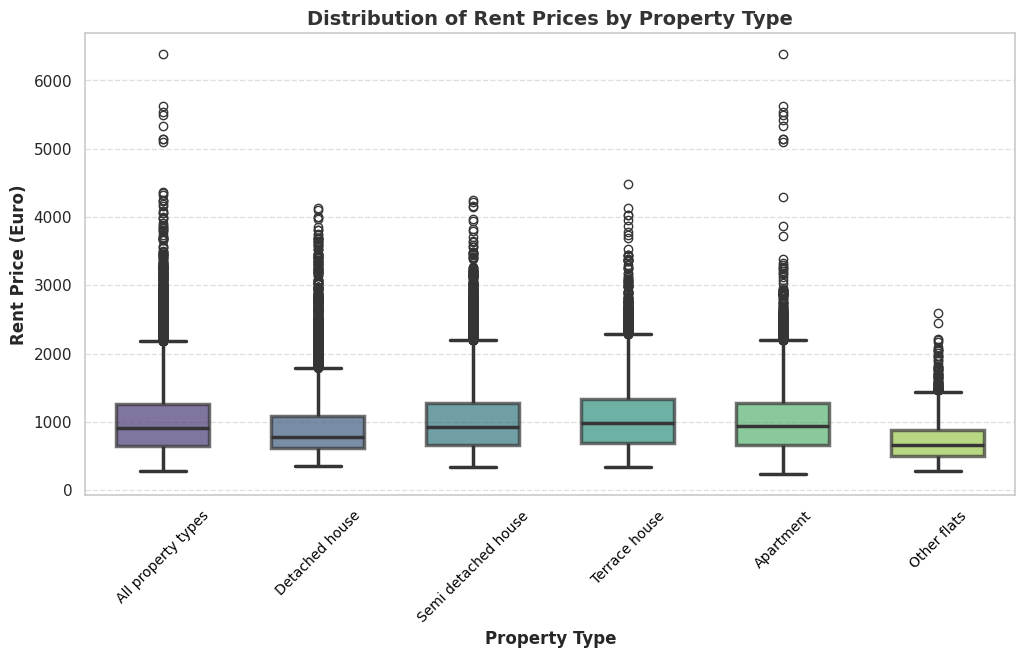

<ipython-input-39-00ef056651a5>:52: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-39-00ef056651a5>:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




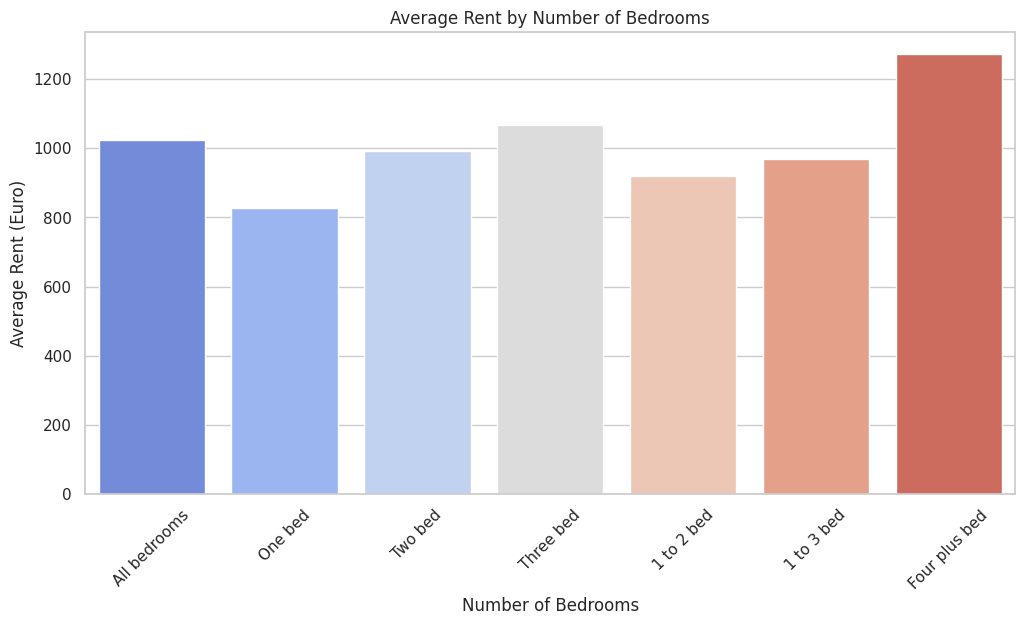

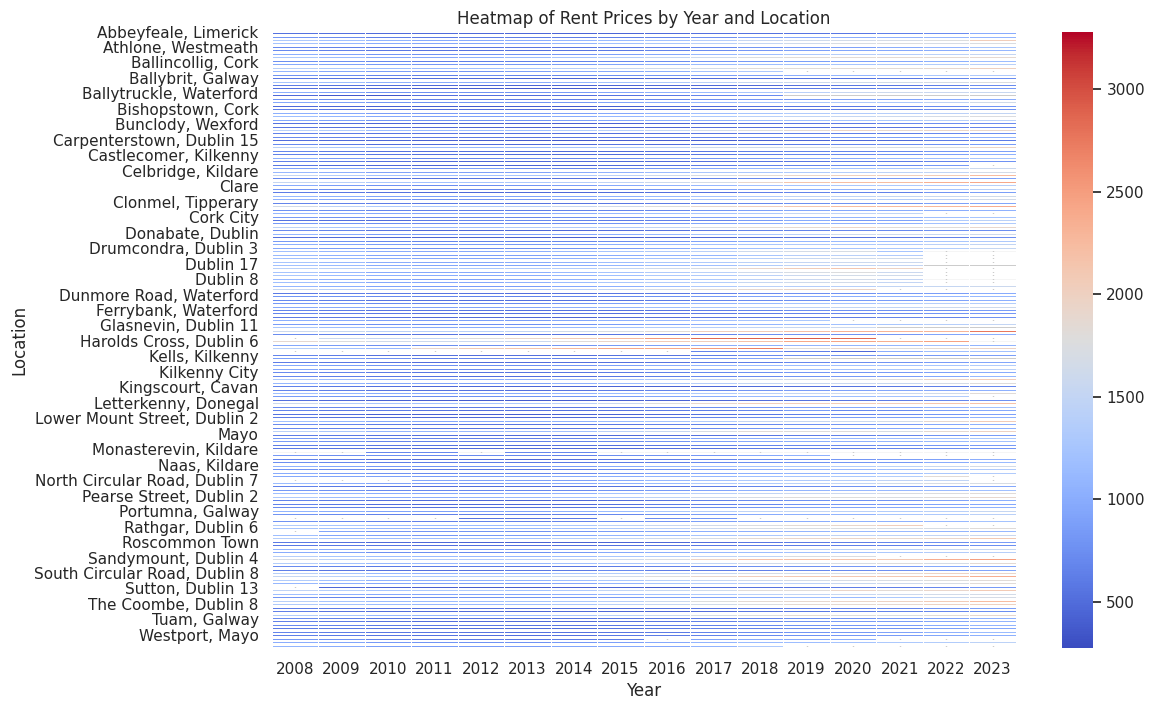

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/RIA02.20250218T210248.csv"
df = pd.read_csv(file_path)

# Filter relevant data (removing NaN values)
df = df.dropna(subset=['VALUE'])

# Set style for seaborn
sns.set_style("whitegrid")

# 1. Line Plot: Trend of Average Rent Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE', data=df, estimator='mean', ci=None, color='b')
plt.title("Trend of Average Rent in Ireland Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rent (Euro)")
plt.xticks(rotation=45)
plt.show()

# 2. Box Plot: Rent Prices by Property Type
import seaborn as sns
import matplotlib.pyplot as plt

# Set a modern theme
sns.set_theme(style="whitegrid")

# Define a vibrant color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='VALUE', data=df, palette="viridis", linewidth=2.5, width=0.6, boxprops=dict(alpha=0.7))

# Improve titles and labels
plt.title("Distribution of Rent Prices by Property Type", fontsize=14, fontweight='bold', color="#333")
plt.xlabel("Property Type", fontsize=12, fontweight='bold')
plt.ylabel("Rent Price (Euro)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, color="black")

# Add a subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# 3. Bar Chart: Comparing Rent by Number of Bedrooms
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Bedrooms', y='VALUE', data=df, estimator='mean', ci=None, palette='coolwarm')
plt.title("Average Rent by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Rent (Euro)")
plt.xticks(rotation=45)
plt.show()

# 4. Heatmap: Rent Prices by Year and Location
pivot_table = df.pivot_table(values='VALUE', index='Location', columns='Year', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Rent Prices by Year and Location")
plt.xlabel("Year")
plt.ylabel("Location")
plt.show()


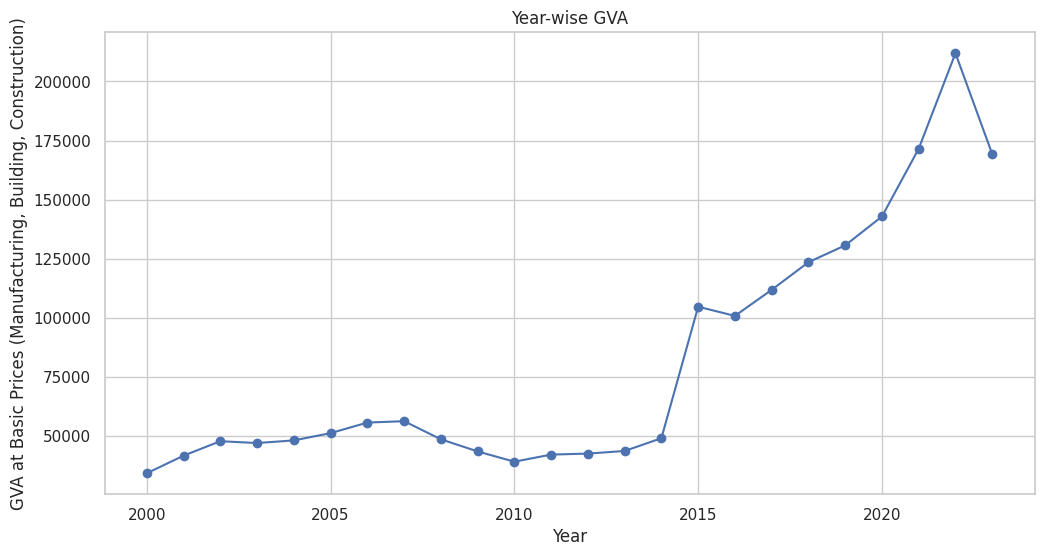

In [40]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/RAA07.20250218T210236.csv")

# Filter data for 'GVA at Basic Prices - Manufacturing, Building and Construction'
filtered_df = df[df['Statistic Label'] == 'GVA at Basic Prices - Manufacturing, Building and Construction']


# Group data by year and calculate the mean value
yearly_gva = filtered_df.groupby('Year')['VALUE'].mean()


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_gva.index, yearly_gva.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('GVA at Basic Prices (Manufacturing, Building, Construction)')
plt.title('Year-wise GVA')
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
sales = pd.read_csv("/content/saleshouse20102023.csv")
sales.head(50)


Statistic Label  Year        County        Dwelling Status  \
0   Value of Sales  2010  All Counties  All Dwelling Statuses   
1   Value of Sales  2010  All Counties  All Dwelling Statuses   
2   Value of Sales  2010  All Counties  All Dwelling Statuses   
3   Value of Sales  2010  All Counties  All Dwelling Statuses   
4   Value of Sales  2010  All Counties  All Dwelling Statuses   
5   Value of Sales  2010  All Counties  All Dwelling Statuses   
6   Value of Sales  2010  All Counties  All Dwelling Statuses   
7   Value of Sales  2010  All Counties  All Dwelling Statuses   
8   Value of Sales  2010  All Counties  All Dwelling Statuses   
9   Value of Sales  2010  All Counties  All Dwelling Statuses   
10  Value of Sales  2010  All Counties  All Dwelling Statuses   
11  Value of Sales  2010  All Counties  All Dwelling Statuses   
12  Value of Sales  2010  All Counties  All Dwelling Statuses   
13  Value of Sales  2010  All Counties  All Dwelling Statuses   
14  Value of Sales  2010  All Counties  All Dwelling Statuses   
15  Value of Sales  2010  All Counties  All Dwelling Statuses   
16  Value of Sales  2010  All Counties  All Dwelling Statuses   
17  Value of Sales  2010  All Counties  All Dwelling Statuses   
18  Value of Sales  2010  All Counties  All Dwelling Statuses   
19  Value of Sales  2010  All Counties  All Dwelling Statuses   
20  Value of Sales  2010  All Counties  All Dwelling Statuses   
21  Value of Sales  2010  All Counties  All Dwelling Statuses   
22  Value of Sales  2010  All Counties  All Dwelling Statuses   
23  Value of Sales  2010  All Counties  All Dwelling Statuses   
24  Value of Sales  2010  All Counties  All Dwelling Statuses   
25  Value of Sales  2010  All Counties  All Dwelling Statuses   
26  Value of Sales  2010  All Counties  All Dwelling Statuses   
27  Value of Sales  2010  All Counties  All Dwelling Statuses   
28  Value of Sales  2010  All Counties  All Dwelling Statuses   
29  Value of Sales  2010  All Counties  All Dwelling Statuses   
30  Value of Sales  2010  All Counties  All Dwelling Statuses   
31  Value of Sales  2010  All Counties  All Dwelling Statuses   
32  Value of Sales  2010  All Counties  All Dwelling Statuses   
33  Value of Sales  2010  All Counties  All Dwelling Statuses   
34  Value of Sales  2010  All Counties  All Dwelling Statuses   
35  Value of Sales  2010  All Counties  All Dwelling Statuses   
36  Value of Sales  2010  All Counties                    New   
37  Value of Sales  2010  All Counties                    New   
38  Value of Sales  2010  All Counties                    New   
39  Value of Sales  2010  All Counties                    New   
40  Value of Sales  2010  All Counties                    New   
41  Value of Sales  2010  All Counties                    New   
42  Value of Sales  2010  All Counties                    New   
43  Value of Sales  2010  All Counties                    New   
44  Value of Sales  2010  All Counties                    New   
45  Value of Sales  2010  All Counties                    New   
46  Value of Sales  2010  All Counties                    New   
47  Value of Sales  2010  All Counties                    New   
48  Value of Sales  2010  All Counties                    New   
49  Value of Sales  2010  All Counties                    New   

   Stamp Duty Event                                      Type of Buyer  \
0           Filings                                    All Buyer Types   
1           Filings                                    All Buyer Types   
2           Filings                                    All Buyer Types   
3           Filings                              Household Buyer - All   
4           Filings                              Household Buyer - All   
5           Filings                              Household Buyer - All   
6           Filings  Household Buyer - First-Time Buyer Owner-Occupier   
7           Filings  Household Buyer - First-Time Buyer Owner-Occupier   
8           Filings  

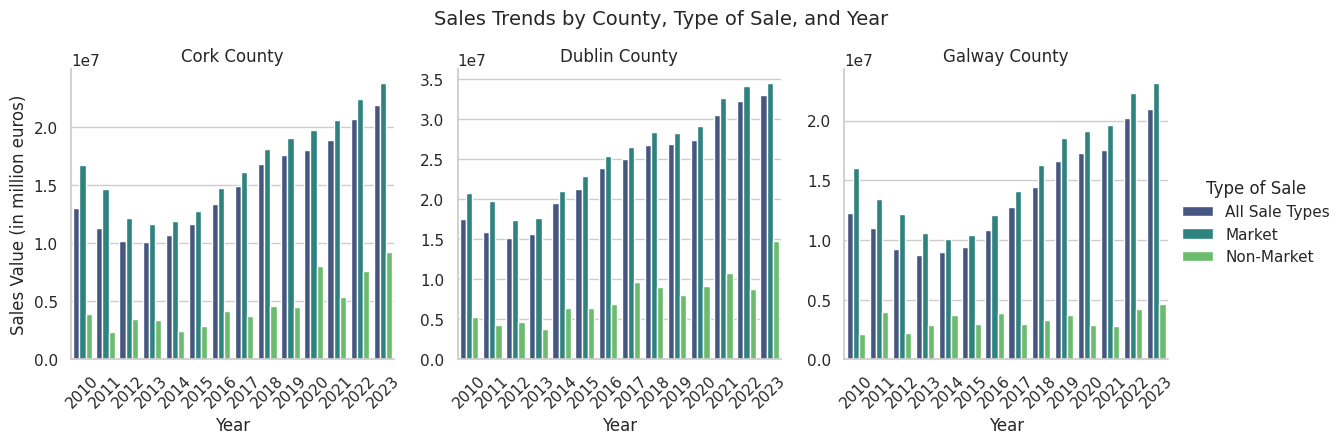

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/saleshouse20102023.csv"
df = pd.read_csv(file_path)

# Filter necessary columns
df_filtered = df[['Year', 'County', 'Type of Sale', 'VALUE']].dropna()

# Aggregate data by summing values for each county, type of sale, and year
df_grouped = df_filtered.groupby(['Year', 'County', 'Type of Sale'])['VALUE'].sum().reset_index()

# Define specific counties to analyze
selected_counties = ["Dublin", "Cork", "Galway"]  # Modify as needed

# Filter data for selected counties
df_selected = df_grouped[df_grouped["County"].isin(selected_counties)]

# Create a facet grid for better visualization without passing hue twice
g = sns.FacetGrid(df_selected, col="County", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Year", y="VALUE", hue="Type of Sale", dodge=True, palette="viridis")

# Adjust plot aesthetics
g.set_titles(col_template="{col_name} County")
g.set_axis_labels("Year", "Sales Value (in million euros)")
g.set_xticklabels(rotation=45)
g.add_legend(title="Type of Sale")

plt.suptitle("Sales Trends by County, Type of Sale, and Year", fontsize=14, y=1.05)
plt.show()


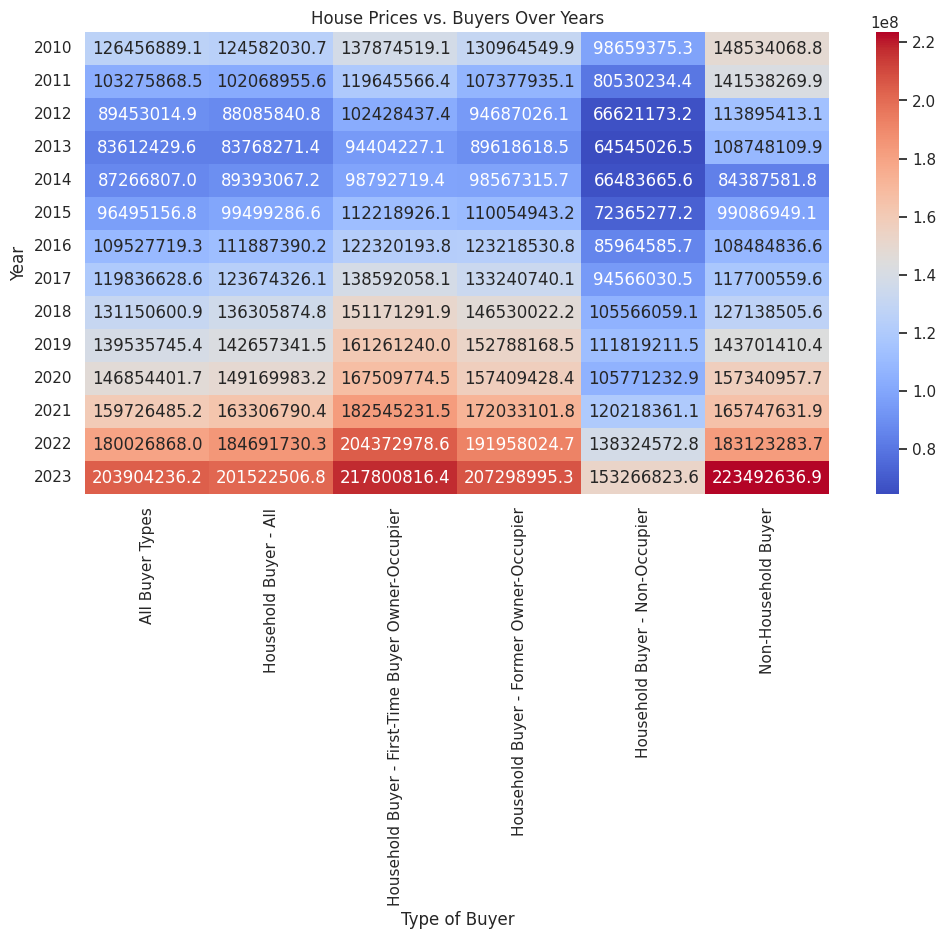

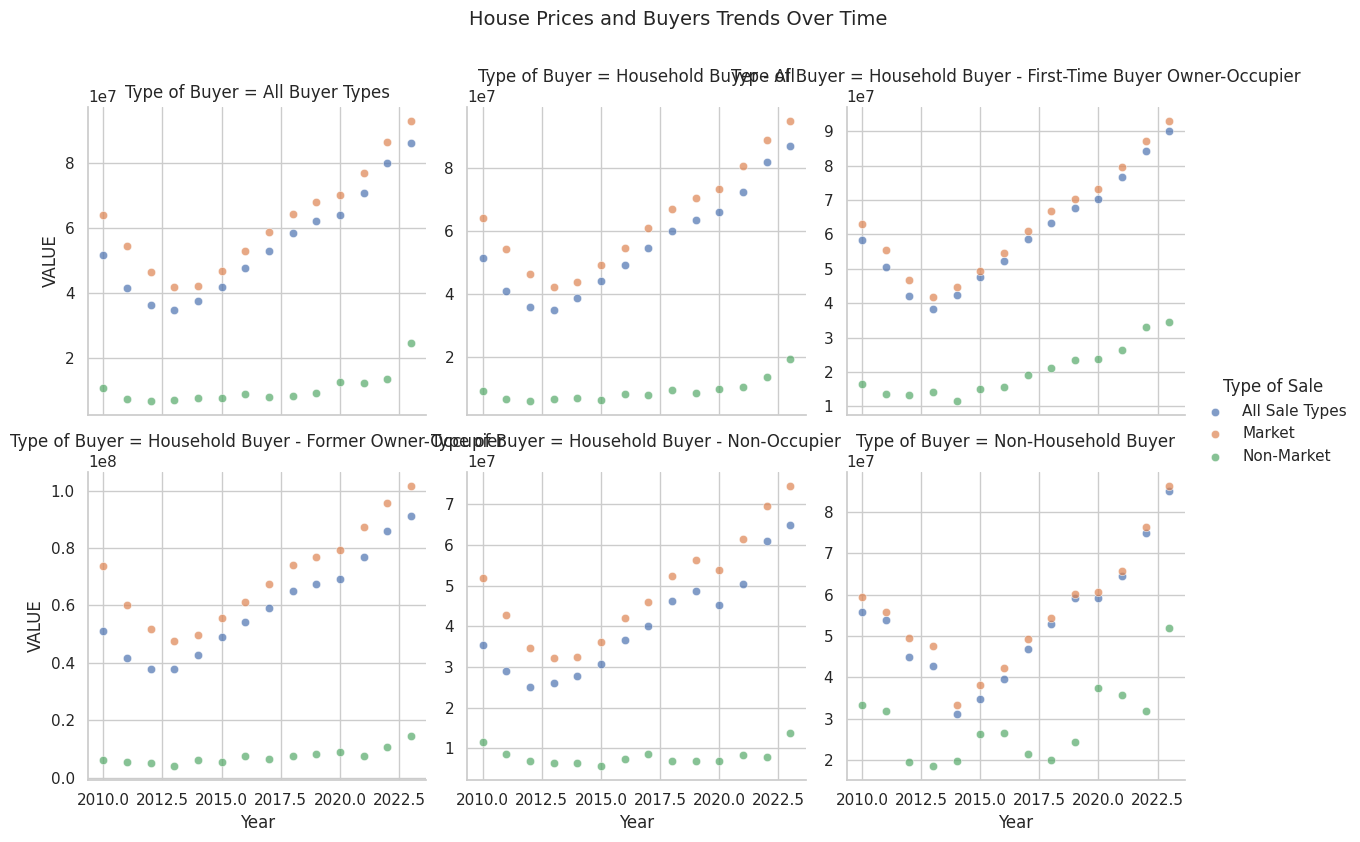

<Figure size 1200x600 with 0 Axes>

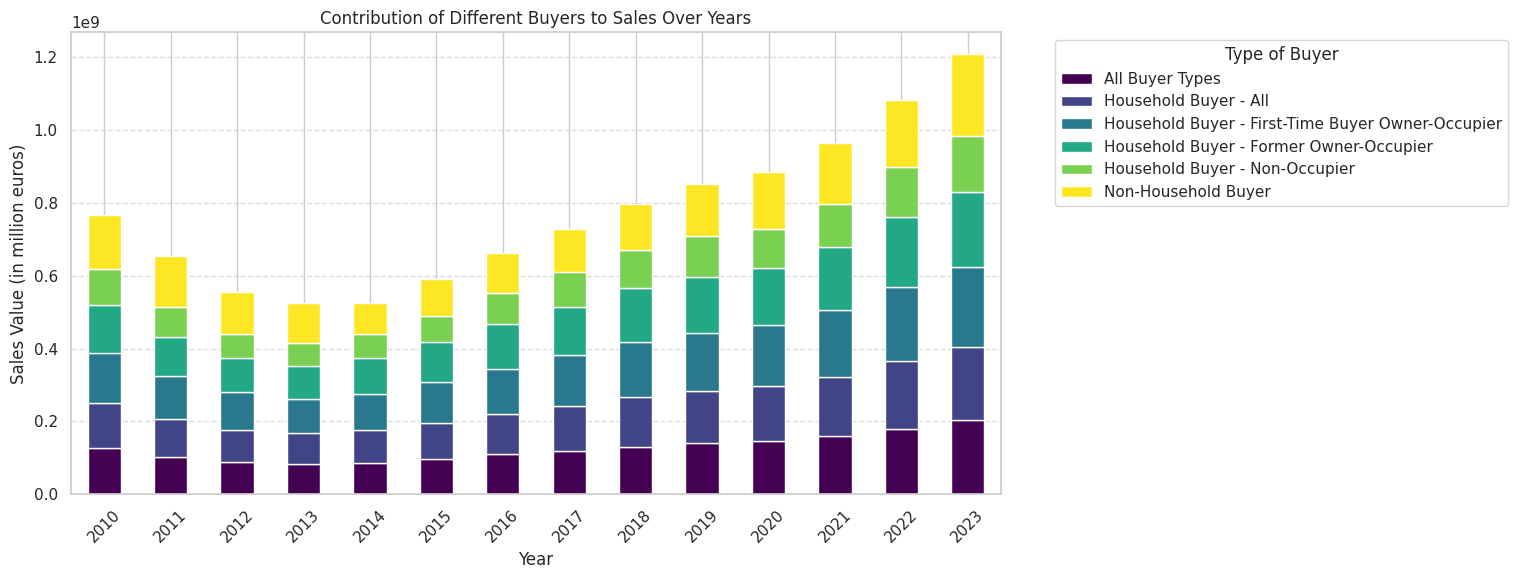

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
file_path = "/content/saleshouse20102023.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Filter relevant columns
df_filtered = df[['Year', 'County', 'Type of Buyer', 'Type of Sale', 'VALUE']].dropna()

# Aggregate data
df_grouped = df_filtered.groupby(['Year', 'Type of Buyer', 'Type of Sale'])['VALUE'].sum().reset_index()

# Pivot the data for heatmap visualization
heatmap_data = df_grouped.pivot_table(index="Year", columns="Type of Buyer", values="VALUE", aggfunc="sum")

# 1. Heatmap: Correlation between House Prices & Buyers per Year
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("House Prices vs. Buyers Over Years")
plt.xlabel("Type of Buyer")
plt.ylabel("Year")
plt.show()

# 2. Scatter plot grid: Yearly Trends of Buyers vs. House Prices
g = sns.FacetGrid(df_grouped, col="Type of Buyer", hue="Type of Sale", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.scatterplot, x="Year", y="VALUE", alpha=0.7)
g.add_legend()
plt.suptitle("House Prices and Buyers Trends Over Time", fontsize=14, y=1.05)
plt.show()
       

# 3. Stacked Bar Chart: Buyer Contribution to Sales
plt.figure(figsize=(12, 6))
df_pivot = df_grouped.pivot_table(index="Year", columns="Type of Buyer", values="VALUE", aggfunc="sum")
df_pivot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Contribution of Different Buyers to Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales Value (in million euros)")
plt.legend(title="Type of Buyer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [44]:
# Load the Ireland counties shapefile
ie_gdf = gpd.read_file("/content/ie.shp")  # Adjust path as needed

# Inspect the GeoDataFrame
ie_gdf.head()


id      name                  source  \
0  IEDL   Donegal  https://simplemaps.com   
1  IELM   Leitrim  https://simplemaps.com   
2  IECN     Cavan  https://simplemaps.com   
3  IEMN  Monaghan  https://simplemaps.com   
4  IELH     Louth  https://simplemaps.com   

                                            geometry  
0  MULTIPOLYGON (((-8.16847 54.46348, -8.1695 54....  
1  POLYGON ((-8.30012 54.47797, -8.29078 54.47259...  
2  POLYGON ((-7.59878 53.93314, -7.59325 53.94983...  
3  POLYGON ((-6.74829 53.91397, -6.8102 53.93567,...  
4  POLYGON ((-6.68437 53.90513, -6.63254 53.92415...

In [45]:
df = pd.read_csv("/content/saleshouse20102023.csv")  # Adjust path
df_filtered = df[['Year', 'County', 'Type of Sale', 'VALUE']].dropna()

# For a simpler example, let's focus on a single year, e.g., 2023
df_2023 = df_filtered[df_filtered['Year'] == 2023]

# Aggregate by county (sum of values in that county for 2023)
df_2023_grouped = df_2023.groupby('County')['VALUE'].sum().reset_index()

# Inspect the aggregated data
df_2023_grouped.head()


County       VALUE
0  All Counties  59468505.9
1        Carlow  37409195.1
2         Cavan  34672507.2
3         Clare  38795914.4
4          Cork  54954601.0

In [46]:
filtered_sales.columns

Index(['Statistic Label', 'Month', 'Dwelling Status', 'Eircode Output',
       'Stamp Duty Event', 'Type of Buyer', 'UNIT', 'VALUE', 'Year', 'Place'],
      dtype='object')

In [47]:
import pandas as pd

# Define years to precompute
years = list(range(2010, 2025))

# Dictionary to store results
precomputed_medians = {}

for year in years:
    yearly_sales = filtered_sales[filtered_sales["Year"] == year]
    median_prices = yearly_sales.groupby("Place", as_index=False)["VALUE"].median()

    # Store in dictionary
    precomputed_medians[year] = median_prices

# Convert to DataFrame for saving
all_years_df = pd.concat([df.assign(Year=year) for year, df in precomputed_medians.items()])
all_years_df.to_csv("precomputed_median_prices.csv", index=False)

print("✅ Precomputed median prices saved!")

✅ Precomputed median prices saved!


In [48]:
import geopandas as gpd
import pandas as pd
import folium
import ipywidgets as widgets
from IPython.display import display
from branca.colormap import linear

# Load shapefile
county_map = gpd.read_file("/content/ie.shp")  # Adjust path

# Load precomputed median prices
median_prices_df = pd.read_csv("precomputed_median_prices.csv")

# Load town-to-county mapping
town_to_county_df = pd.read_csv("/content/town_to_county.csv")
town_to_county = dict(zip(town_to_county_df["Place"], town_to_county_df["County"]))

# Convert 'Place' to 'County' in median_prices_df
median_prices_df["County"] = median_prices_df["Place"].map(town_to_county)

# Define a slider widget
year_slider = widgets.IntSlider(
    value=2024, min=2010, max=2024, step=1, description="Year"
)

# Output widget to display the map
map_output = widgets.Output()

# Function to update and display the interactive map
def update_map(year):
    with map_output:
        map_output.clear_output(wait=True)  # Clear previous map

        # Filter precomputed data
        median_prices = median_prices_df[median_prices_df["Year"] == year]

        # Merge with county map
        county_map_merged = county_map.merge(median_prices, left_on="name", right_on="County", how="left")

        # Normalize color scale
        colormap = linear.OrRd_09.scale(
            county_map_merged["VALUE"].min(), county_map_merged["VALUE"].max()
        )

        # Create Folium map
        m = folium.Map(location=[53.5, -7.5], zoom_start=7)  # Center on Ireland

        # Add counties to the map
        for _, row in county_map_merged.iterrows():
            geojson = folium.GeoJson(
                row["geometry"],
                style_function=lambda feature, value=row["VALUE"]: {
                    "fillColor": colormap(value) if value else "gray",
                    "color": "black",
                    "weight": 1,
                    "fillOpacity": 0.7 if value else 0.3,
                },
                tooltip=folium.Tooltip(f"{row['County']}: €{row['VALUE']:.0f}" if pd.notna(row["VALUE"]) else row["County"])
            )
            geojson.add_to(m)

        # Add color legend
        colormap.caption = "Median House Prices (€)"
        colormap.add_to(m)

        # Display the map inside the output widget
        display(m)

# Create an interactive widget
interactive_map = widgets.interactive(update_map, year=year_slider)

# Display slider and map output
display(year_slider, map_output)

# Call the function to display the initial map
update_map(year_slider.value)

IntSlider(value=2024, description='Year', max=2024, min=2010)

Output()